# __Cargar Datos__

In [78]:
import joblib
dir_list = [
    {
    "dir_name": "NYU",
    "single_phenotype_file": True,
    },
    {
    "dir_name": "NeuroIMAGE",
    "single_phenotype_file": True,
    },
    {
    "dir_name": "KKI",
    "single_phenotype_file": True,
    },
    {
    "dir_name": "OHSU",
    "single_phenotype_file": True,
    },
    {
    "dir_name": "Peking",
    "single_phenotype_file": False,
    },
    ]

n_rois = 116
all_data = {}
site2idx = {}         # Diccionario para codificar los sitios como enteros
train_ts_list = []
train_labels = []
train_sites = []  
train_ids = []    # <--- Lista paralela con los sitios

for idx, dataset in enumerate(dir_list):
    dir_name = dataset["dir_name"]
    site2idx[dir_name] = idx          # Asignamos un entero a cada sitio

    data = joblib.load(f"../{n_rois}-rois-dataset/{dir_name}.pkl")
    # ts_list, labels = data["data"], data["labels"]
    ids, ts_list, labels = data["id"], data["data"], data["labels"]
    all_data[dir_name] = {"data": ts_list, "labels": labels, 'ids': ids}

    train_ts_list.extend(ts_list)
    train_labels.extend(labels)
    train_ids.extend(ids)
    train_sites.extend([idx] * len(ts_list))  # Añadir código del sitio para cada muestra

    print("Dataset: {}, Count: {}".format(dir_name, len(ts_list)))
    print(10 * "*")

idx2site = {v: k for k, v in site2idx.items()}

# Estadísticas
print("\nTotal de muestras:", len(train_ts_list))
print("Total con TDHA:", sum(train_labels))
print("Número de sitios:", len(site2idx))



Dataset: NYU, Count: 177
**********
Dataset: NeuroIMAGE, Count: 39
**********
Dataset: KKI, Count: 78
**********
Dataset: OHSU, Count: 66
**********
Dataset: Peking, Count: 183
**********

Total de muestras: 543
Total con TDHA: 229
Número de sitios: 5


In [79]:
import numpy as np

# Convertimos cada matriz de señal BOLD (116, T) en un vector (116,)
# tomando el promedio de cada ROI (eje 1: temporal)
mean_bold_matrix = np.array([
    np.mean(ts, axis=1) for ts in train_ts_list
])

# Verificación de dimensiones
print("Forma de la matriz resultante (sujetos x ROIs):", mean_bold_matrix.shape)
# Debería dar: (543, 116)

# Ejemplo: mostrar las primeras 5 filas
print(mean_bold_matrix[:1])


Forma de la matriz resultante (sujetos x ROIs): (543, 116)
[[ 3.4653863e-10 -1.0396159e-09  3.4653863e-10  0.0000000e+00
  -6.9307726e-10 -1.3861545e-09 -1.7326932e-10 -3.4653863e-10
   3.4653863e-10  5.1980797e-10 -6.9307726e-10  5.5446181e-09
   6.9307726e-10  2.7723090e-09  7.7971191e-10  0.0000000e+00
  -6.9307726e-10 -6.9307726e-10 -6.9307726e-10 -6.9307726e-10
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  -2.7723090e-09  0.0000000e+00 -2.7723090e-09 -1.2128852e-09
  -6.9307726e-10 -2.0792319e-09  1.3861545e-09  1.0396159e-09
   6.9307726e-10  1.2128852e-09 -3.4220691e-09 -1.3861545e-09
   0.0000000e+00 -3.4653863e-10  6.9307726e-10 -1.3861545e-09
   2.0792319e-09 -6.9307726e-10  4.1584638e-09  0.0000000e+00
   1.3861545e-09 -6.9307726e-10 -1.3861545e-09 -1.7326932e-10
   1.3861545e-09  1.3861545e-09  0.0000000e+00 -2.7723090e-09
   0.0000000e+00  2.7723090e-09  1.3861545e-09  6.9307726e-10
  -8.6634661e-10  0.0000000e+00  1.3861545e-09  2.0792319e-09
   1.039615

In [80]:
for subj_idx in range(5):
    print(f"\n👤 Sujeto {subj_idx}:")
    
    # Extraer la matriz BOLD original del sujeto (116, T)
    ts = train_ts_list[subj_idx]
    
    # Calcular manualmente la media de los primeros 5 ROIs
    manual_means = np.mean(ts[:5, :], axis=1)
    
    # Extraer del mean_bold_matrix la misma info
    auto_means = mean_bold_matrix[subj_idx, :5]
    
    # Mostrar comparaciones
    for roi_idx in range(5):
        print(f"  ROI {roi_idx}: manual = {manual_means[roi_idx]}, auto = {auto_means[roi_idx]}")



👤 Sujeto 0:
  ROI 0: manual = 3.4653863112410477e-10, auto = 3.4653863112410477e-10
  ROI 1: manual = -1.0396159488834655e-09, auto = -1.0396159488834655e-09
  ROI 2: manual = 3.4653863112410477e-10, auto = 3.4653863112410477e-10
  ROI 3: manual = 0.0, auto = 0.0
  ROI 4: manual = -6.930772622482095e-10, auto = -6.930772622482095e-10

👤 Sujeto 1:
  ROI 0: manual = -1.0396159488834655e-09, auto = -1.0396159488834655e-09
  ROI 1: manual = -2.599039872208664e-10, auto = -2.599039872208664e-10
  ROI 2: manual = 1.7326931556205238e-10, auto = 1.7326931556205238e-10
  ROI 3: manual = -2.599039872208664e-10, auto = -2.599039872208664e-10
  ROI 4: manual = 5.198079744417328e-10, auto = 5.198079744417328e-10

👤 Sujeto 2:
  ROI 0: manual = -1.386154524496419e-09, auto = -1.386154524496419e-09
  ROI 1: manual = -3.4653863112410477e-10, auto = -3.4653863112410477e-10
  ROI 2: manual = 9.52981249469076e-10, auto = 9.52981249469076e-10
  ROI 3: manual = 1.8193277995237622e-09, auto = 1.819327799523

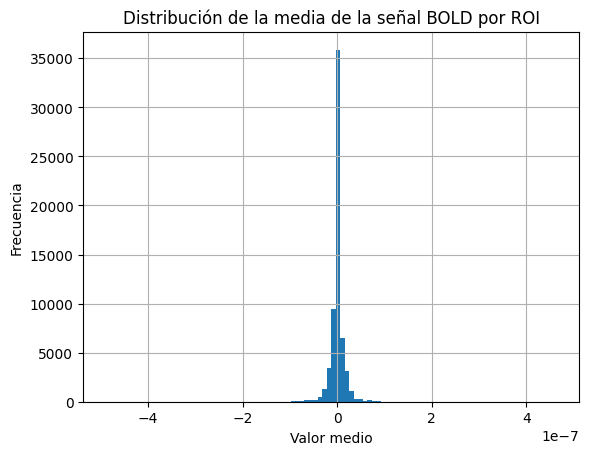

In [81]:
import matplotlib.pyplot as plt

plt.hist(mean_bold_matrix.flatten(), bins=100)
plt.title("Distribución de la media de la señal BOLD por ROI")
plt.xlabel("Valor medio")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


In [82]:
import pandas as pd

labels = pd.read_csv(f"../../output_rois/{n_rois}/mis{n_rois}_rois_names.csv", index_col=0)

print(labels.shape)
labels.head()

(116, 1)


,name
id,
1,Precentral_L
2,Precentral_R
3,Frontal_Sup_L
4,Frontal_Sup_R
5,Frontal_Sup_Orb_L


In [83]:
import pandas as pd
import numpy as np

# Asegúrate de que hay exactamente 116 nombres
roi_names = labels["name"].values
assert len(roi_names) == mean_bold_matrix.shape[1], " Número de ROIs no coincide"

# Crear DataFrame con los nombres correctos como columnas
df_mean_bold = pd.DataFrame(mean_bold_matrix, columns=roi_names)

# Mostrar las primeras filas
print(df_mean_bold.shape)
df_mean_bold.head()


(543, 116)


,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Cerebelum_10_L,Cerebelum_10_R,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
0,3.465386e-10,-1.039616e-09,3.465386e-10,0.000000e+00,-6.930773e-10,-1.386155e-09,-1.732693e-10,-3.465386e-10,3.465386e-10,5.198080e-10,...,-1.299520e-09,-3.465386e-10,-1.386155e-09,-2.772309e-09,6.930773e-10,-8.663466e-10,-1.299520e-09,-1.039616e-09,1.732693e-10,-6.064426e-10
1,-1.039616e-09,-2.599040e-10,1.732693e-10,-2.599040e-10,5.198080e-10,-8.663466e-11,-6.930773e-10,0.000000e+00,-2.079232e-09,0.000000e+00,...,-9.313226e-10,-5.631253e-10,2.252501e-09,1.386155e-09,-6.930773e-10,-6.930773e-10,2.079232e-09,-1.386155e-09,0.000000e+00,-1.386155e-09
2,-1.386155e-09,-3.465386e-10,9.529812e-10,1.819328e-09,5.544618e-09,1.386155e-09,0.000000e+00,-3.465386e-10,-8.663466e-10,1.386155e-09,...,-2.685674e-09,-1.039616e-09,-2.079232e-09,-1.386155e-09,2.079232e-09,6.930773e-10,0.000000e+00,-7.797119e-10,3.378752e-09,0.000000e+00
3,5.198080e-10,-5.198080e-10,-8.663466e-10,0.000000e+00,-4.764906e-10,0.000000e+00,-3.465386e-10,-8.663466e-11,0.000000e+00,0.000000e+00,...,-1.732693e-10,1.732693e-10,1.039616e-09,0.000000e+00,1.386155e-09,-4.331733e-10,0.000000e+00,-4.331733e-10,1.212885e-09,1.386155e-09
4,-4.331733e-11,0.000000e+00,7.797119e-10,3.465386e-10,1.212885e-09,-2.772309e-09,0.000000e+00,-3.465386e-10,0.000000e+00,-2.772309e-09,...,-2.599040e-10,-6.930773e-10,-6.757503e-09,6.930773e-10,2.772309e-09,3.465386e-09,6.930773e-10,2.079232e-09,-2.079232e-09,0.000000e+00


In [84]:
# Crear la columna diagnosis a partir de train_labels
diagnosis = ["ADHD" if label == 1 else "CONTROL" for label in train_labels]

# Insertar como primera columna del DataFrame
df_mean_bold.insert(0, "diagnosis", diagnosis)

In [85]:
# Verificación rápida
print(df_mean_bold.shape)

df_mean_bold[df_mean_bold['diagnosis'] == 'ADHD']

(543, 117)


,diagnosis,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,...,Cerebelum_10_L,Cerebelum_10_R,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
0,ADHD,3.465386e-10,-1.039616e-09,3.465386e-10,0.000000e+00,-6.930773e-10,-1.386155e-09,-1.732693e-10,-3.465386e-10,3.465386e-10,...,-1.299520e-09,-3.465386e-10,-1.386155e-09,-2.772309e-09,6.930773e-10,-8.663466e-10,-1.299520e-09,-1.039616e-09,1.732693e-10,-6.064426e-10
5,ADHD,3.465386e-10,1.039616e-09,-1.126251e-09,3.465386e-10,6.930773e-10,-1.386155e-09,-6.930773e-10,1.386155e-09,6.930773e-10,...,-6.930773e-10,6.930773e-10,-3.465386e-10,-6.930773e-10,1.732693e-09,-6.930773e-10,3.465386e-10,1.386155e-09,-1.386155e-09,-3.118848e-09
8,ADHD,2.079232e-09,2.599040e-10,3.465386e-10,-1.386155e-09,6.930773e-10,-6.930773e-10,-4.331733e-10,-6.930773e-10,-1.386155e-09,...,6.930773e-10,6.930773e-10,-8.316928e-09,0.000000e+00,-5.631253e-10,1.386155e-09,0.000000e+00,1.732693e-10,6.930773e-10,-8.663466e-10
10,ADHD,-6.930773e-10,-8.663466e-10,6.930773e-10,0.000000e+00,1.732693e-10,-2.772309e-09,2.425770e-09,1.732693e-09,2.772309e-09,...,6.930773e-10,-1.386155e-09,2.772309e-09,2.079232e-09,-1.039616e-09,-5.198080e-10,-4.331733e-10,-3.465386e-10,-3.465386e-10,-1.386155e-09
13,ADHD,1.732693e-10,-1.732693e-10,0.000000e+00,-8.663466e-10,1.039616e-09,-3.032213e-10,-1.732693e-09,-4.331733e-10,-3.811925e-09,...,6.930773e-10,-1.039616e-09,-1.732693e-09,-1.905962e-09,2.079232e-09,-6.930773e-10,6.930773e-10,0.000000e+00,6.930773e-10,-6.930773e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,ADHD,0.000000e+00,-8.221330e-09,0.000000e+00,-1.644266e-08,8.221330e-09,-8.221330e-09,1.644266e-08,-8.221330e-09,-1.644266e-08,...,-1.335966e-08,0.000000e+00,-8.221330e-09,-6.577064e-08,1.644266e-08,8.221330e-09,-2.055333e-08,1.849799e-08,0.000000e+00,-2.466399e-08
535,ADHD,0.000000e+00,0.000000e+00,2.260866e-08,-6.165998e-09,8.221330e-09,0.000000e+00,-8.221330e-09,0.000000e+00,1.644266e-08,...,-8.221330e-09,2.055333e-08,1.644266e-08,1.644266e-08,2.055333e-09,4.110665e-09,8.221330e-09,-4.110665e-08,4.110665e-09,2.466399e-08
538,ADHD,-2.055333e-08,8.221330e-09,-8.221330e-09,0.000000e+00,0.000000e+00,2.466399e-08,-8.221330e-09,-8.221330e-09,-2.055333e-09,...,-7.193664e-09,1.644266e-08,-3.288532e-08,-1.644266e-08,-4.110665e-08,-8.221330e-09,2.877466e-08,2.055333e-08,8.221330e-09,-1.644266e-08
539,ADHD,-4.110665e-09,-4.110665e-09,1.027666e-09,0.000000e+00,-4.110665e-09,0.000000e+00,6.165998e-09,-2.055333e-08,-8.221330e-09,...,3.288532e-08,-4.110665e-09,1.644266e-08,-3.288532e-08,-1.233200e-08,8.221330e-09,-8.221330e-09,-2.055333e-08,-8.221330e-09,-3.699598e-08


In [86]:
# Convertimos los índices numéricos en nombres de sitio
site_names = [idx2site[idx] for idx in train_sites]

# Insertamos como nueva columna (puede ir al final o al inicio)
#df_mean_bold["site_name"] = site_names
df_mean_bold.insert(0, "site_name", site_names)


In [87]:
df_mean_bold.head()

,site_name,diagnosis,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,...,Cerebelum_10_L,Cerebelum_10_R,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
0,NYU,ADHD,3.465386e-10,-1.039616e-09,3.465386e-10,0.000000e+00,-6.930773e-10,-1.386155e-09,-1.732693e-10,-3.465386e-10,...,-1.299520e-09,-3.465386e-10,-1.386155e-09,-2.772309e-09,6.930773e-10,-8.663466e-10,-1.299520e-09,-1.039616e-09,1.732693e-10,-6.064426e-10
1,NYU,CONTROL,-1.039616e-09,-2.599040e-10,1.732693e-10,-2.599040e-10,5.198080e-10,-8.663466e-11,-6.930773e-10,0.000000e+00,...,-9.313226e-10,-5.631253e-10,2.252501e-09,1.386155e-09,-6.930773e-10,-6.930773e-10,2.079232e-09,-1.386155e-09,0.000000e+00,-1.386155e-09
2,NYU,CONTROL,-1.386155e-09,-3.465386e-10,9.529812e-10,1.819328e-09,5.544618e-09,1.386155e-09,0.000000e+00,-3.465386e-10,...,-2.685674e-09,-1.039616e-09,-2.079232e-09,-1.386155e-09,2.079232e-09,6.930773e-10,0.000000e+00,-7.797119e-10,3.378752e-09,0.000000e+00
3,NYU,CONTROL,5.198080e-10,-5.198080e-10,-8.663466e-10,0.000000e+00,-4.764906e-10,0.000000e+00,-3.465386e-10,-8.663466e-11,...,-1.732693e-10,1.732693e-10,1.039616e-09,0.000000e+00,1.386155e-09,-4.331733e-10,0.000000e+00,-4.331733e-10,1.212885e-09,1.386155e-09
4,NYU,CONTROL,-4.331733e-11,0.000000e+00,7.797119e-10,3.465386e-10,1.212885e-09,-2.772309e-09,0.000000e+00,-3.465386e-10,...,-2.599040e-10,-6.930773e-10,-6.757503e-09,6.930773e-10,2.772309e-09,3.465386e-09,6.930773e-10,2.079232e-09,-2.079232e-09,0.000000e+00


In [88]:
df_mean_bold['site_name'].value_counts()

site_name
Peking        183
NYU           177
KKI            78
OHSU           66
NeuroIMAGE     39
Name: count, dtype: int64

In [89]:
# Asegurarte de que el número de IDs coincide con las filas del DataFrame
assert len(train_ids) == df_mean_bold.shape[0], "❌ Número de IDs no coincide con las filas del DataFrame"

# Agregar la columna
#df_mean_bold["subject_id"] = train_ids

df_mean_bold.insert(0, "subject_id", train_ids)

# Verificación
df_mean_bold.head()


,subject_id,site_name,diagnosis,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,...,Cerebelum_10_L,Cerebelum_10_R,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
0,NYU-4060823,NYU,ADHD,3.465386e-10,-1.039616e-09,3.465386e-10,0.000000e+00,-6.930773e-10,-1.386155e-09,-1.732693e-10,...,-1.299520e-09,-3.465386e-10,-1.386155e-09,-2.772309e-09,6.930773e-10,-8.663466e-10,-1.299520e-09,-1.039616e-09,1.732693e-10,-6.064426e-10
1,NYU-9578663,NYU,CONTROL,-1.039616e-09,-2.599040e-10,1.732693e-10,-2.599040e-10,5.198080e-10,-8.663466e-11,-6.930773e-10,...,-9.313226e-10,-5.631253e-10,2.252501e-09,1.386155e-09,-6.930773e-10,-6.930773e-10,2.079232e-09,-1.386155e-09,0.000000e+00,-1.386155e-09
2,NYU-3518345,NYU,CONTROL,-1.386155e-09,-3.465386e-10,9.529812e-10,1.819328e-09,5.544618e-09,1.386155e-09,0.000000e+00,...,-2.685674e-09,-1.039616e-09,-2.079232e-09,-1.386155e-09,2.079232e-09,6.930773e-10,0.000000e+00,-7.797119e-10,3.378752e-09,0.000000e+00
3,NYU-3650634,NYU,CONTROL,5.198080e-10,-5.198080e-10,-8.663466e-10,0.000000e+00,-4.764906e-10,0.000000e+00,-3.465386e-10,...,-1.732693e-10,1.732693e-10,1.039616e-09,0.000000e+00,1.386155e-09,-4.331733e-10,0.000000e+00,-4.331733e-10,1.212885e-09,1.386155e-09
4,NYU-3243657,NYU,CONTROL,-4.331733e-11,0.000000e+00,7.797119e-10,3.465386e-10,1.212885e-09,-2.772309e-09,0.000000e+00,...,-2.599040e-10,-6.930773e-10,-6.757503e-09,6.930773e-10,2.772309e-09,3.465386e-09,6.930773e-10,2.079232e-09,-2.079232e-09,0.000000e+00


In [90]:
df_phenotypic = pd.read_csv("../../data/all_phenotypic_single_df/all_phenotypic_df.csv")
df_phenotypic.head()


,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,...,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,dataset,id
0,1084283,6,1.0,11.000000,1.0,1,NaN,3.0,NaN,69.0,...,110.0,2.0,0.0,1.0,1.0,NaN,1.0,NaN,OHSU,OHSU-1084283
1,1084884,6,0.0,9.416667,1.0,0,enuresis,3.0,NaN,48.0,...,106.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,OHSU,OHSU-1084884
2,1108916,6,1.0,8.500000,1.0,1,ODD,3.0,NaN,70.0,...,116.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,OHSU,OHSU-1108916
3,1206380,6,1.0,9.166667,1.0,3,NaN,3.0,NaN,63.0,...,90.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,OHSU,OHSU-1206380
4,1340333,6,0.0,7.416667,1.0,1,NaN,3.0,NaN,80.0,...,98.0,2.0,1.0,1.0,1.0,NaN,1.0,NaN,OHSU,OHSU-1340333


In [91]:
# Asegúrate de que los nombres de columna estén como strings (por si acaso)
df_mean_bold["subject_id"] = df_mean_bold["subject_id"].astype(str)
df_phenotypic["id"] = df_phenotypic["id"].astype(str)

# Hacer merge (left join) asegurando que subject_id de df_mean_bold coincida con id de df_phenotypic
merged_df = df_mean_bold.merge(df_phenotypic[["id", "Gender", "Age"]],
                                left_on="subject_id", right_on="id", how="left")

# Eliminar la columna 'id' redundante
merged_df.drop(columns=["id"], inplace=True)

# Reordenar columnas: queremos que Gender y Age estén como columnas 4 y 5 (índices 3 y 4)
# Paso 1: Obtener todas las columnas
cols = merged_df.columns.tolist()

# Paso 2: Mover 'Gender' y 'Age' a la posición 3 y 4
# Nota: subject_id (0), diagnosis (1), site_name (2)
cols.insert(3, cols.pop(cols.index("Gender")))
cols.insert(4, cols.pop(cols.index("Age")))

# Paso 3: Reorganizar el DataFrame
df_mean_bold = merged_df[cols]

# Verificación
df_mean_bold.head()



,subject_id,site_name,diagnosis,Gender,Age,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,...,Cerebelum_10_L,Cerebelum_10_R,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
0,NYU-4060823,NYU,ADHD,1.0,11.80,3.465386e-10,-1.039616e-09,3.465386e-10,0.000000e+00,-6.930773e-10,...,-1.299520e-09,-3.465386e-10,-1.386155e-09,-2.772309e-09,6.930773e-10,-8.663466e-10,-1.299520e-09,-1.039616e-09,1.732693e-10,-6.064426e-10
1,NYU-9578663,NYU,CONTROL,0.0,8.26,-1.039616e-09,-2.599040e-10,1.732693e-10,-2.599040e-10,5.198080e-10,...,-9.313226e-10,-5.631253e-10,2.252501e-09,1.386155e-09,-6.930773e-10,-6.930773e-10,2.079232e-09,-1.386155e-09,0.000000e+00,-1.386155e-09
2,NYU-3518345,NYU,CONTROL,0.0,7.67,-1.386155e-09,-3.465386e-10,9.529812e-10,1.819328e-09,5.544618e-09,...,-2.685674e-09,-1.039616e-09,-2.079232e-09,-1.386155e-09,2.079232e-09,6.930773e-10,0.000000e+00,-7.797119e-10,3.378752e-09,0.000000e+00
3,NYU-3650634,NYU,CONTROL,0.0,13.25,5.198080e-10,-5.198080e-10,-8.663466e-10,0.000000e+00,-4.764906e-10,...,-1.732693e-10,1.732693e-10,1.039616e-09,0.000000e+00,1.386155e-09,-4.331733e-10,0.000000e+00,-4.331733e-10,1.212885e-09,1.386155e-09
4,NYU-3243657,NYU,CONTROL,1.0,8.56,-4.331733e-11,0.000000e+00,7.797119e-10,3.465386e-10,1.212885e-09,...,-2.599040e-10,-6.930773e-10,-6.757503e-09,6.930773e-10,2.772309e-09,3.465386e-09,6.930773e-10,2.079232e-09,-2.079232e-09,0.000000e+00


In [92]:
# Reemplazar los valores de Gender
df_mean_bold["Gender"] = df_mean_bold["Gender"].map({1: "M", 0: "F"})

# Verificación rápida
df_mean_bold["Gender"].value_counts()


Gender
M    348
F    195
Name: count, dtype: int64

In [93]:
df_mean_bold.head()

,subject_id,site_name,diagnosis,Gender,Age,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,...,Cerebelum_10_L,Cerebelum_10_R,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
0,NYU-4060823,NYU,ADHD,M,11.80,3.465386e-10,-1.039616e-09,3.465386e-10,0.000000e+00,-6.930773e-10,...,-1.299520e-09,-3.465386e-10,-1.386155e-09,-2.772309e-09,6.930773e-10,-8.663466e-10,-1.299520e-09,-1.039616e-09,1.732693e-10,-6.064426e-10
1,NYU-9578663,NYU,CONTROL,F,8.26,-1.039616e-09,-2.599040e-10,1.732693e-10,-2.599040e-10,5.198080e-10,...,-9.313226e-10,-5.631253e-10,2.252501e-09,1.386155e-09,-6.930773e-10,-6.930773e-10,2.079232e-09,-1.386155e-09,0.000000e+00,-1.386155e-09
2,NYU-3518345,NYU,CONTROL,F,7.67,-1.386155e-09,-3.465386e-10,9.529812e-10,1.819328e-09,5.544618e-09,...,-2.685674e-09,-1.039616e-09,-2.079232e-09,-1.386155e-09,2.079232e-09,6.930773e-10,0.000000e+00,-7.797119e-10,3.378752e-09,0.000000e+00
3,NYU-3650634,NYU,CONTROL,F,13.25,5.198080e-10,-5.198080e-10,-8.663466e-10,0.000000e+00,-4.764906e-10,...,-1.732693e-10,1.732693e-10,1.039616e-09,0.000000e+00,1.386155e-09,-4.331733e-10,0.000000e+00,-4.331733e-10,1.212885e-09,1.386155e-09
4,NYU-3243657,NYU,CONTROL,M,8.56,-4.331733e-11,0.000000e+00,7.797119e-10,3.465386e-10,1.212885e-09,...,-2.599040e-10,-6.930773e-10,-6.757503e-09,6.930773e-10,2.772309e-09,3.465386e-09,6.930773e-10,2.079232e-09,-2.079232e-09,0.000000e+00


In [94]:
print(df_mean_bold.shape)

(543, 121)


In [95]:
df_mean_bold.to_csv(f"./{n_rois}-rois-mean_bold_matrix.csv", index=False)
print(f"✅ Guardado como './{n_rois}-rois-mean_bold_matrix.csv'")

✅ Guardado como './116-rois-mean_bold_matrix.csv'
